In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
#Reading csv file
df = pd.read_csv(r'C:\Users\manid\Desktop\DS sem1\Data 601\Project1\uber_data\uber-raw-data-janjune-15.csv')

In [3]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [5]:
df.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


### Question-1
Summarizing Data by Dispatching_base_num and locationID and sorting dataframe by Dispatching_base_num and locationID,
having maximum pickups

In [6]:
#grouping the data by two columns 'Dispatching_base_num','locationID' and checking the pickups count on each combination

Disp_base_num_locationID = df.groupby(['Dispatching_base_num','locationID']).size().reset_index(name='Pickups')

#sorting the data by count of pickups at each combination and setting inplace as True makes changes permanent
Disp_base_num_locationID.sort_values(by='Pickups',ascending=False,inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
Disp_base_num_locationID.reset_index(drop=True,inplace=True)
Disp_base_num_locationID

,Dispatching_base_num,locationID,Pickups
0,B02764,161,179389
1,B02764,231,171308
2,B02764,234,163941
3,B02764,79,162905
4,B02764,249,129927
...,...,...,...
1941,B02836,63,1
1942,B02835,184,1
1943,B02835,1,1
1944,B02836,155,1


### Question-2
Displaying the locationID with maximum Pickups

In [7]:
#Finding the index and value count of occurence of locationID
#Using index and values to get locationID and count of occurence of locationID

loc_count = df.locationID.value_counts().sort_values(ascending=False).values[0]
loc_ind = df.locationID.value_counts().sort_values(ascending=False).index[0]

print(f'The locationID with highest occurence is "{loc_ind}" and the count of occurence is "{loc_count}"')

The locationID with highest occurence is "161" and the count of occurence is "460732"


### Question-3
Displaying Dispatching_base_num with maximum Occurence

1st approach: Using group by function

In [8]:
disp= df.groupby('Dispatching_base_num').size()

#sorting the data "disp" in descending order based on count of Dispatching base

#Using index and values to get Dispatching base and count of occurence of Dispatching base
disp_count= disp.sort_values(ascending=False).values[0]
disp_ind = disp.sort_values(ascending=False).index[0]

print(f'The Dispatching_base_num occuring max times is "{disp_ind}" and the count of occurence is "{disp_count}"')

The Dispatching_base_num occuring max times is "B02764" and the count of occurence is "5753653"


2nd approach: using value_counts function

In [9]:
disp=df['Dispatching_base_num'].value_counts()  #value_counts gives count of Dispatching and in descending order by count
disp_count = disp.values[0]
disp_ind = disp.index[0]

print(f'The Dispatching_base_num occuring max times is "{disp_ind}" and the count of occurence is "{disp_count}"')

The Dispatching_base_num occuring max times is "B02764" and the count of occurence is "5753653"


### Question-4
Displaying 3 week days with highest Traffic

In [10]:
#typecasting column Pick_date from string to datetime64
df['Pickup_date']=pd.to_datetime(df['Pickup_date'])

1st approach: Using 'for' loop and strftime function to create a new column for Weekdays (time taking approach)

In [11]:
#strftime is used to convert date and time objects to their string representation.
arr1 = []
for values in df['Pickup_date']:
    arr1.append(values.strftime('%A'))    #parameter %A gives full weekday name i.e. Sunday, Monday etc.
df['Day'] = arr1

2nd Approach: Using dt function to create a new column for weekday(Efficient Way)

In [12]:
#Creating a column "Day" using dt.day_name()
df['Day'] = df['Pickup_date'].dt.day_name()     #day_name() gives name of the weekday whereas dt.day gives day number

In [13]:
#creating new column with only date using dt.date
df['Date'] = df['Pickup_date'].dt.date

In [14]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Date
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,2015-05-17
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,2015-05-17
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,2015-05-17
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,2015-05-17
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,2015-05-17
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,Friday,2015-05-08
14270475,B02765,2015-05-08 15:43:00,B02765,263,Friday,2015-05-08
14270476,B02765,2015-05-08 15:43:00,B02765,90,Friday,2015-05-08
14270477,B02765,2015-05-08 15:44:00,B01899,45,Friday,2015-05-08


In [15]:
#Finding Top 3 dates with highest pickup count
date_list = df.groupby('Date').size().sort_values(ascending=False).head(3).index

#Finding value count of Top 3 dates with highest pickup count
date_count = df.groupby('Date').size().sort_values(ascending=False).head(3).values

print('Top 3 Dates with highest traffic are:')
for i in range(3):
    print(date_list[i],':',date_count[i])
    
print('\nWeekday of those corresponding dates are:')
for i in range(3):
    print(date_list[i],':',date_list[i].strftime('%A'))

Top 3 Dates with highest traffic are:
2015-06-27 : 136193
2015-05-16 : 121557
2015-04-25 : 106270

Weekday of those corresponding dates are:
2015-06-27 : Saturday
2015-05-16 : Saturday
2015-04-25 : Saturday


### Weekdays with highest traffic

In [16]:
#Finding Top 3 weekdays with highest pickup count
day_list = df.groupby('Day').size().sort_values(ascending=False).head(3).index

#Finding value count of Top 3 weekdays with highest pickup count
day_count = df.groupby('Day').size().sort_values(ascending=False).head(3).values

day_list = day_list.tolist()
day_count = day_count.tolist()

print('Days with highes traffic:')
for i in range(3):
    print(day_list[i],':',day_count[i])

Days with highes traffic:
Saturday : 2414563
Friday : 2282571
Thursday : 2159598


### Question-5
Displaying List of Dispatching Bases and no. of bases

In [17]:
Disp_count=df.groupby('Dispatching_base_num').ngroups  # ngroups gives number of distinct groups
Disp_list=df['Dispatching_base_num'].unique()   # unique gives list of unique values in column

print('List of Dispatching base:',Disp_list)
print('Number of Dispatching bases are',Disp_count)

List of Dispatching base: ['B02617' 'B02598' 'B02682' 'B02764' 'B02512' 'B02765' 'B02835' 'B02836']
Number of Dispatching bases are 8


### Questions-6
Summarizing data per day and week, and plotting number of pickups per day and week

In [18]:
#Creating a new column for Week number using dt.isocalendar().week
#The isocalendar() function returns a named tuple containing year, week number, and weekday in ISO format

df['WeekNum']=df['Pickup_date'].dt.isocalendar().week   #.week gives week number of year of given date

In [19]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Date,WeekNum
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,2015-05-17,20
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,2015-05-17,20
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,2015-05-17,20
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,2015-05-17,20
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,2015-05-17,20
...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,Friday,2015-05-08,19
14270475,B02765,2015-05-08 15:43:00,B02765,263,Friday,2015-05-08,19
14270476,B02765,2015-05-08 15:43:00,B02765,90,Friday,2015-05-08,19
14270477,B02765,2015-05-08 15:44:00,B01899,45,Friday,2015-05-08,19


## Plotting Number of pickups per Day

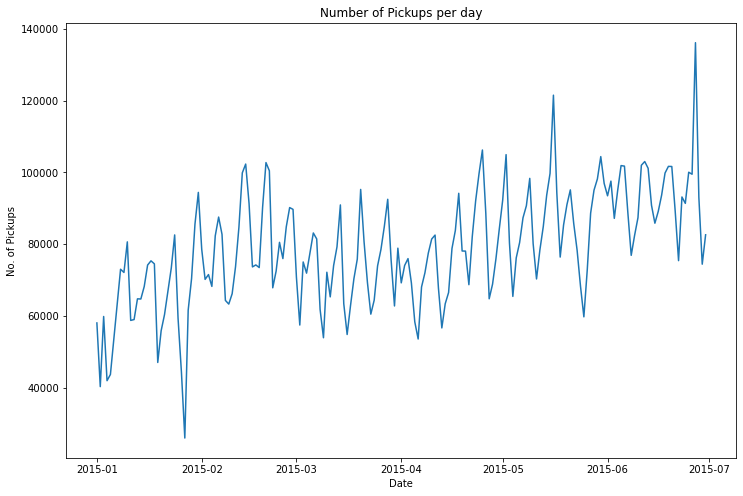

In [20]:
plt.title('Number of Pickups per day')
plt.xlabel('Date')
plt.ylabel('No. of Pickups')

dates = df.groupby('Date').size().index
pickups = df.groupby('Date').size().values
plt.plot(dates,pickups)
plt.gcf().set_size_inches(12,8)   # setting the size of the chart to 12 by 8 inches

## Plotting Number of Pickups per Week
Using Conditional Coloring, where it displays red for bars less than mean value of pickups count and
green for bars higher than mean

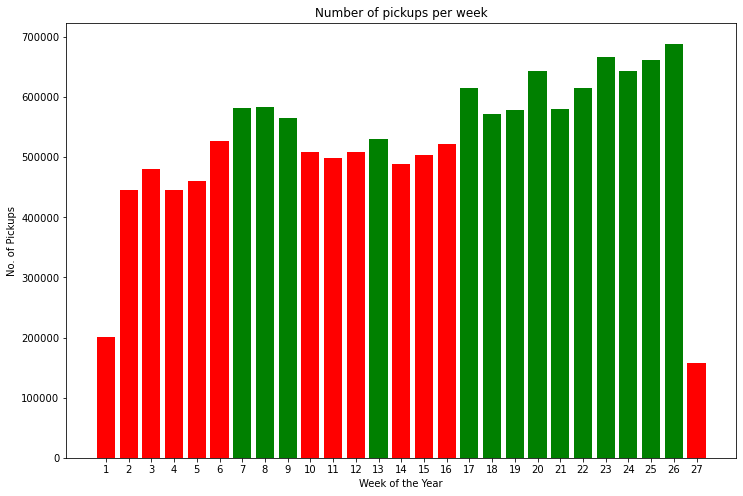

In [21]:
plt.title('Number of pickups per week')
plt.xlabel('Week of the Year')
plt.ylabel('No. of Pickups')
plt.xticks(np.arange(1,28))   #setting x axis labels

#using customized coloring to color bars
#red is for pickups less than mean value of pickups and green for which are higher than mean

colors = ['g' if (bar > df.groupby('WeekNum').size().values.mean()) else 'r' for bar in df.groupby('WeekNum').size().values]

# Week number on x-axis & Pickup count as height of bar
plt.bar(df.groupby('WeekNum').size().index,df.groupby('WeekNum').size().values,color=colors)
plt.gcf().set_size_inches(12,8)  # setting the size of the chart to 12 by 8 inches
plt.show()

## Plotting pickups per hour of every month

In [22]:
# creating a new column for month using dt.month_name()
df['Month']=df['Pickup_date'].dt.month_name()

In [23]:
#creating column for hour of the day using dt.hour
df['Hour'] = df['Pickup_date'].dt.hour

In [24]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Date,WeekNum,Month,Hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,2015-05-17,20,May,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,2015-05-17,20,May,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,2015-05-17,20,May,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,2015-05-17,20,May,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,2015-05-17,20,May,9


In [25]:
hourly_pickup = df.groupby(['Hour','Month']).size().reset_index(name='Pickups')

#sorting the data by month based on calendar using "pd.Categorical"
hourly_pickup['Month'] = pd.Categorical(hourly_pickup['Month'], ['January','February','March','April','May','June'])
hourly_pickup.sort_values(by=['Hour','Month'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
hourly_pickup.reset_index(drop=True,inplace=True)
hourly_pickup

,Hour,Month,Pickups
0,0,January,76524
1,0,February,89746
2,0,March,93857
3,0,April,95669
4,0,May,121816
...,...,...,...
139,23,February,123275
140,23,March,124727
141,23,April,133403
142,23,May,162543


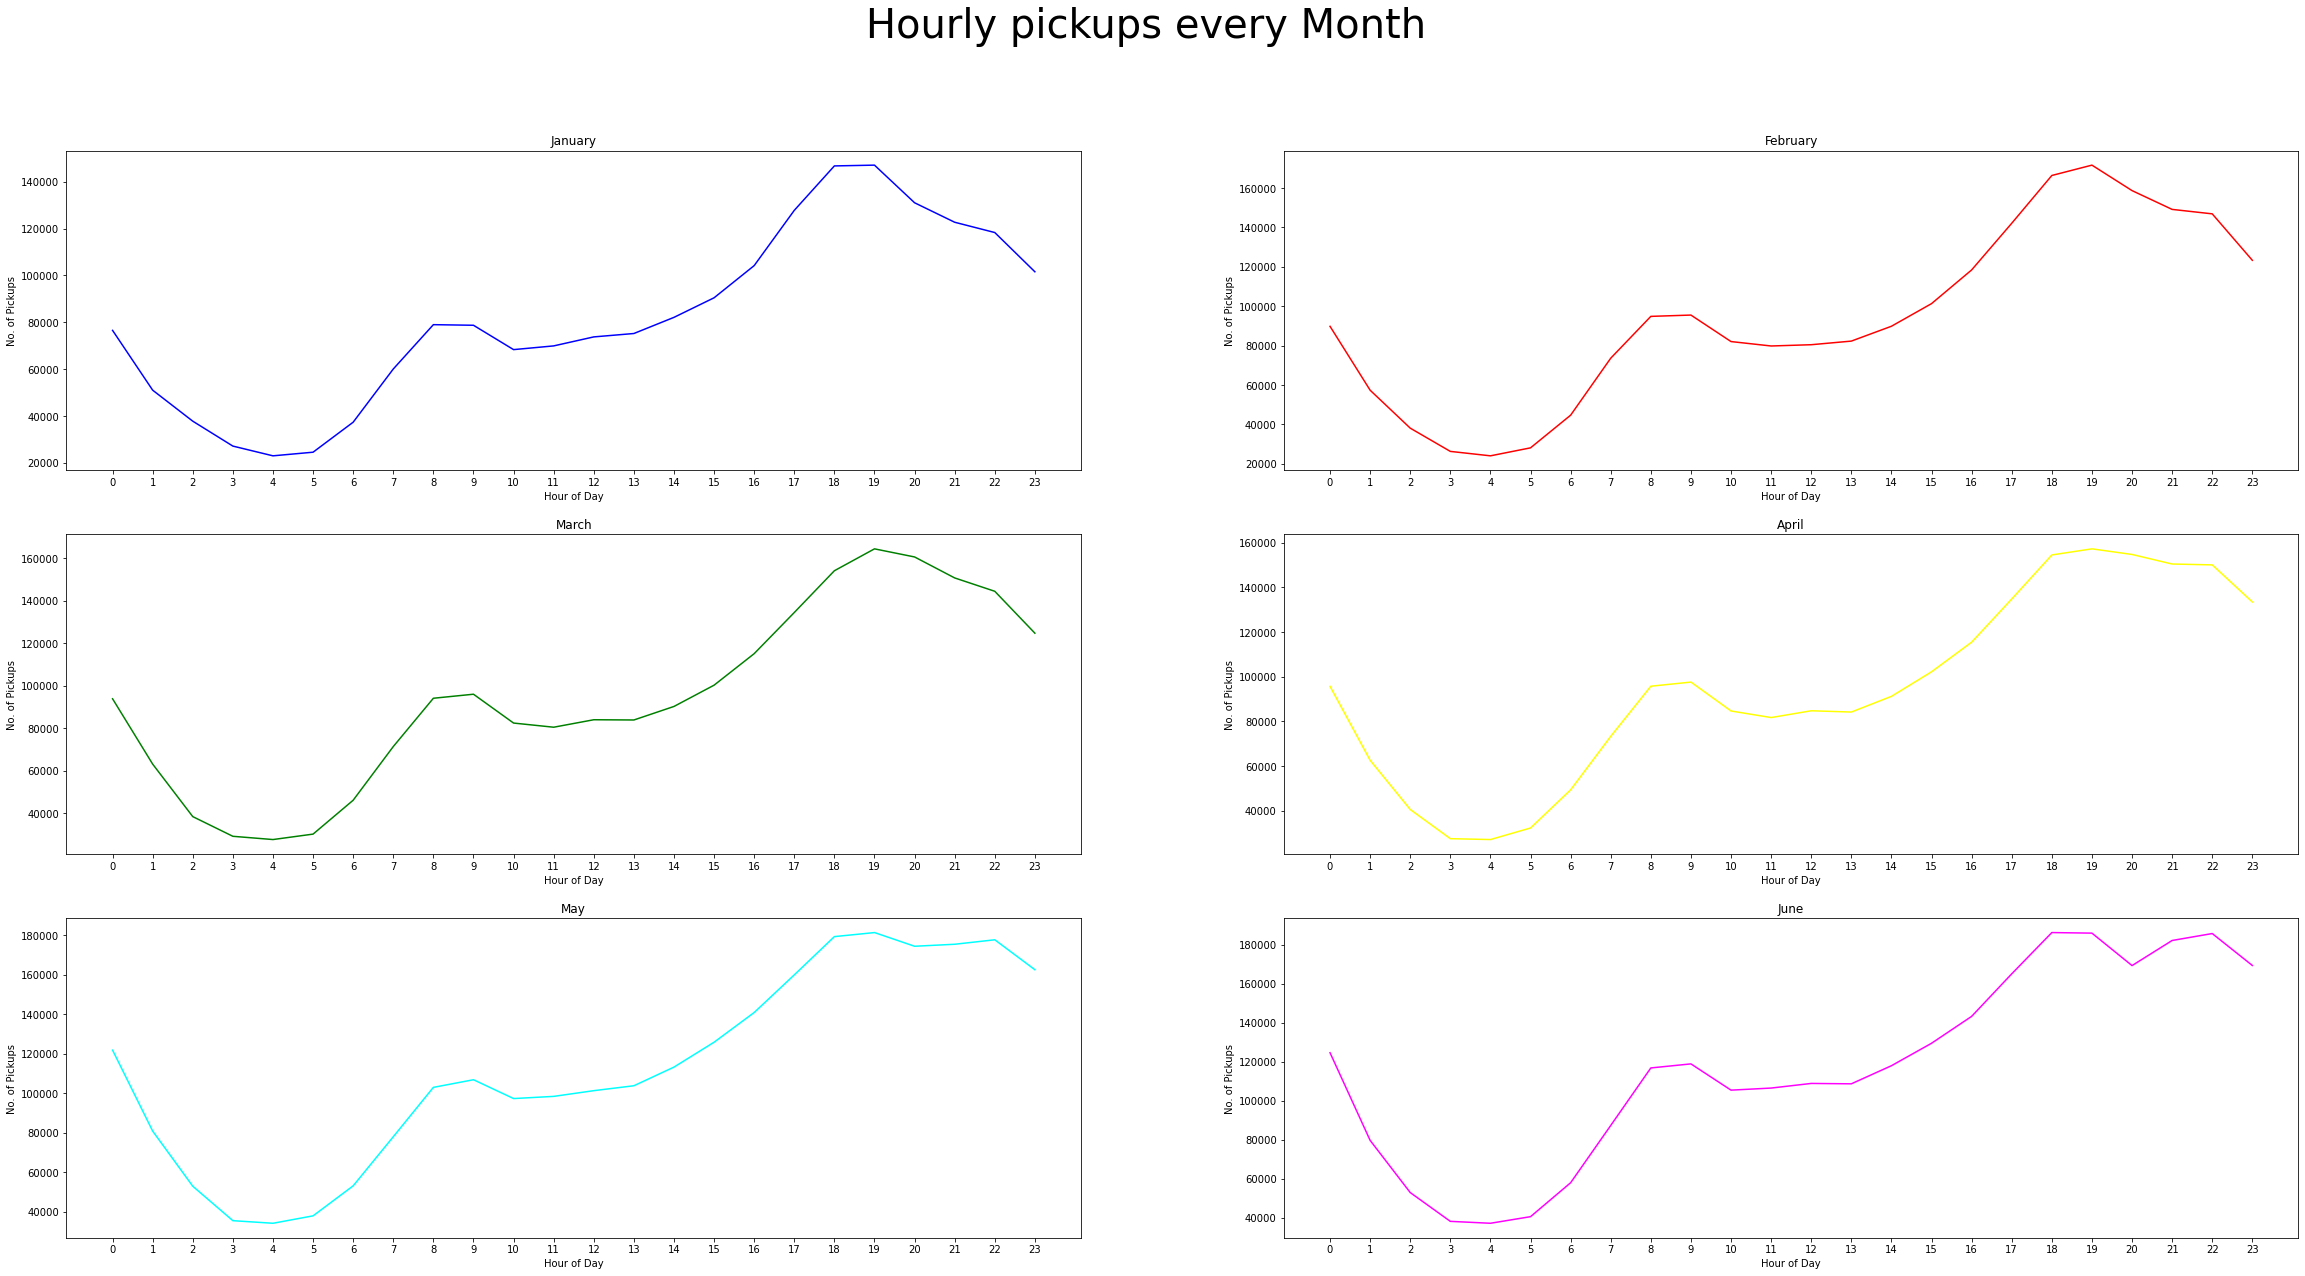

In [26]:
plt.figure(figsize=(40,20))
color = ['blue','red','green','yellow','cyan','magenta']
plt.suptitle('Hourly pickups every Month', fontsize=40)  # setting title for subplot

#Using for loop to plot each subplot and enumerate to use index and value of the parameter passed(month)
for i,month in enumerate(hourly_pickup['Month'].unique()):
    plt.subplot(3,2,i+1)   #i is used to index the each subplot in incremental order
    
    # hour of day as x-axis and Pickup count as y-axis
    plt.plot(hourly_pickup[hourly_pickup['Month']==month]['Hour'],hourly_pickup[hourly_pickup['Month']==month]['Pickups'],color=color[i])
    plt.title(month)   # Title for each plot in subplot as Month name
    plt.xlabel('Hour of Day')
    plt.ylabel('No. of Pickups')
    plt.xticks(np.arange(0,24))  #setting x axis labels

### Monthly pickups

In [27]:
#creating new dataframe with Months and No.of pickups in each month
Monthly_traffic=df.groupby('Month').size().sort_values(ascending=False).reset_index(name='Pickups')

#sorting the data by month based on calendar using "pd.Categorical"
Monthly_traffic['Month'] = pd.Categorical(Monthly_traffic['Month'], ['January','February','March','April','May','June'])
Monthly_traffic.sort_values(by=['Month'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
Monthly_traffic.reset_index(drop=True,inplace =True)
Monthly_traffic

,Month,Pickups
0,January,1953801
1,February,2263620
2,March,2259773
3,April,2280837
4,May,2695553
5,June,2816895


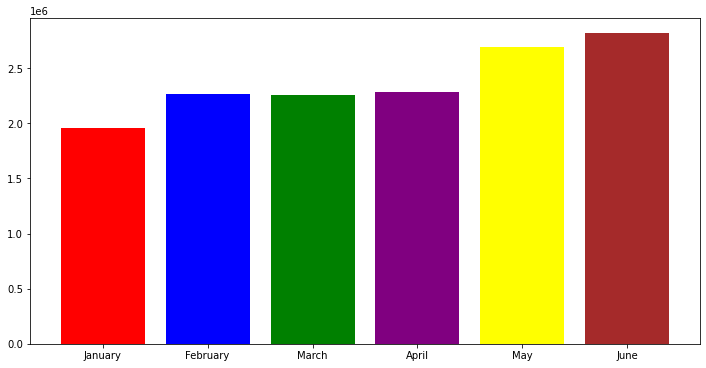

In [28]:
fig = plt.figure(figsize=(12,6))
c=['red','blue','green','purple','yellow','brown']   # Used for coloring each bar
plt.bar(x='Month',height='Pickups',data=Monthly_traffic,color=c)
plt.show()

### Plotting Number of pickups per Dispatching base per month using seaborn

In [29]:
#creating dataframe for getting count of pickups for each base in each month
Disp_base=df.groupby(['Dispatching_base_num','Month']).size().reset_index(name='Pickups')

In [30]:
#sorting the dataframe Disp_base according to calendar months using "pd.Categorical"
Disp_base['Month'] = pd.Categorical(Disp_base['Month'], ['January','February','March','April','May','June'])
Disp_base.sort_values(by='Month',inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
Disp_base.reset_index(drop=True,inplace =True)
Disp_base.head()

,Dispatching_base_num,Month,Pickups
0,B02682,January,299371
1,B02512,January,46216
2,B02765,January,57239
3,B02598,January,251620
4,B02617,January,354848


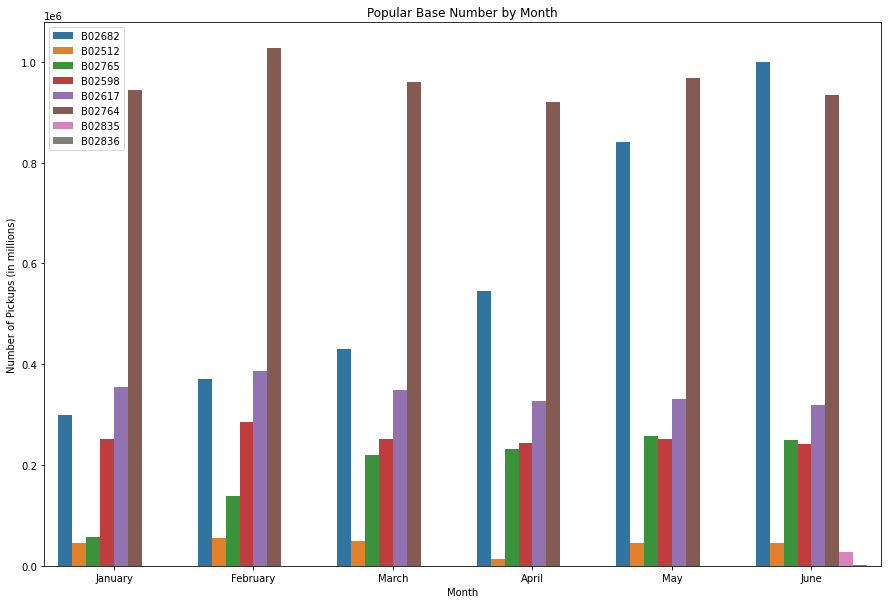

In [31]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Month',y='Pickups', hue='Dispatching_base_num',data=Disp_base)
ax.set_title('Popular Base Number by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Pickups (in millions)')
plt.legend(loc = 'best')   # legend to display the label in the graph (best is used to set label at best suited location)
plt.show()

### Plotting traffic of Dispatching_base_num based on hour of day

In [32]:
#creating new dataframe to get pickup count of base at each hour of the day
base_hour = df.groupby(['Dispatching_base_num','Hour'])['Pickup_date'].count().reset_index()
base_hour = base_hour.rename(columns={'Pickup_date':'Pickups'})
base_hour

,Dispatching_base_num,Hour,Pickups
0,B02512,0,8870
1,B02512,1,5426
2,B02512,2,3537
3,B02512,3,2332
4,B02512,4,2189
...,...,...,...
187,B02836,19,153
188,B02836,20,100
189,B02836,21,134
190,B02836,22,103


Text(0, 0.5, 'No. of Pickups')

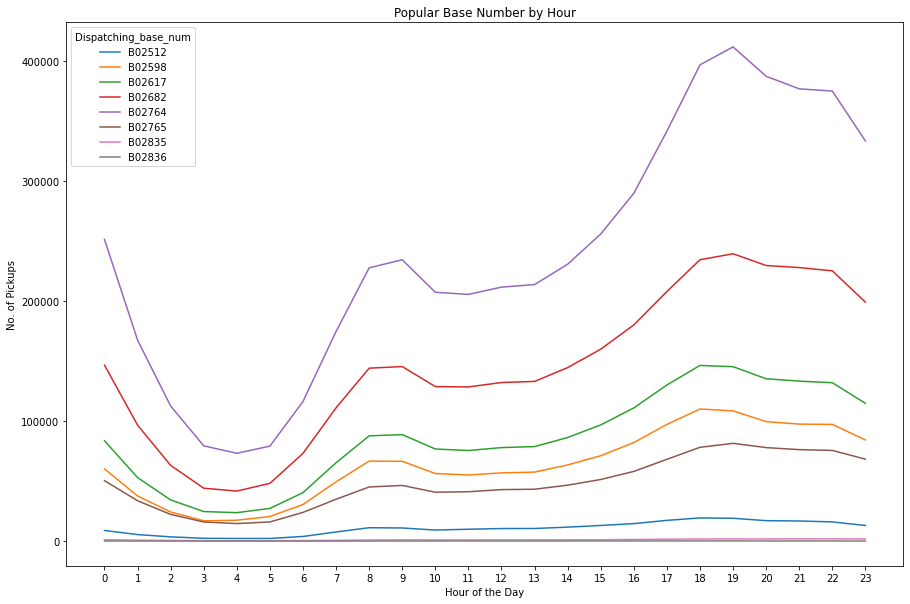

In [33]:
plt.figure(figsize=(15,10))
bx = sns.lineplot(x='Hour',y='Pickups', hue='Dispatching_base_num',data=base_hour)

bx.set_xticks(np.arange(0,24))  #setting x-axis labels

bx.set_title('Popular Base Number by Hour')
bx.set_xlabel('Hour of the Day')
bx.set_ylabel('No. of Pickups')

### Poinplot of pickups on weekdays based on hour of the day

In [34]:
#creating dataframe to get pickup count of each weekday at every hour of the day
hour_weekday=df.groupby(['Day','Hour'])['Pickup_date'].count().reset_index()
hour_weekday = hour_weekday.rename(columns={'Pickup_date':'Pickups'})
hour_weekday.head()

,Day,Hour,Pickups
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


In [35]:
#sorting the dataframe Disp_base according to calendar months using "pd.Categorical"
hour_weekday['Day'] = pd.Categorical(hour_weekday['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
hour_weekday.sort_values(by='Day',inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
hour_weekday.reset_index(drop=True,inplace =True)
hour_weekday

,Day,Hour,Pickups
0,Monday,23,70006
1,Monday,3,12698
2,Monday,4,19126
3,Monday,5,30747
4,Monday,6,49151
...,...,...,...
163,Sunday,3,61720
164,Sunday,2,87501
165,Sunday,1,125564
166,Sunday,10,65176


Text(0, 0.5, 'No. of Pickups')

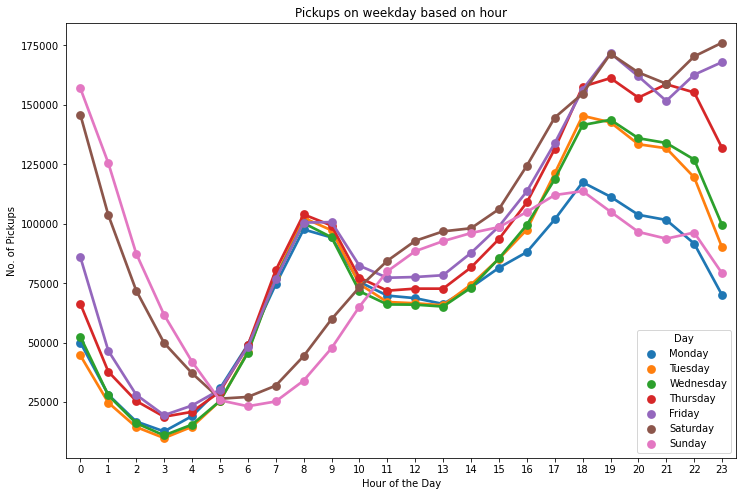

In [36]:
plt.figure(figsize=(12,8))
bx = sns.pointplot(x='Hour',y='Pickups',hue='Day',data=hour_weekday)

bx.set_title('Pickups on weekday based on hour')
bx.set_xlabel('Hour of the Day')
bx.set_ylabel('No. of Pickups')

### Heatmap of Pickups of weekdays vs months

In [37]:
month_weekday = df.groupby(['Month','Day']).size().reset_index(name='Pickups')

#sorting the data by month based on calendar using "pd.Categorical"
month_weekday['Month'] = pd.Categorical(month_weekday['Month'], ['January','February','March','April','May','June'])

#sorting the data by day based on calendar using "pd.Categorical"
month_weekday['Day'] = pd.Categorical(month_weekday['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

month_weekday.sort_values(by=['Month','Day'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
month_weekday.reset_index(drop=True,inplace=True)
month_weekday.head()

,Month,Day,Pickups
0,January,Monday,194004
1,January,Tuesday,200125
2,January,Wednesday,250109
3,January,Thursday,336532
4,January,Friday,345532


In [38]:
#Creating pivot table for the dataframe "month_weekday" with Month as index
pivot_month = month_weekday.pivot(index='Month',columns='Day',values='Pickups')

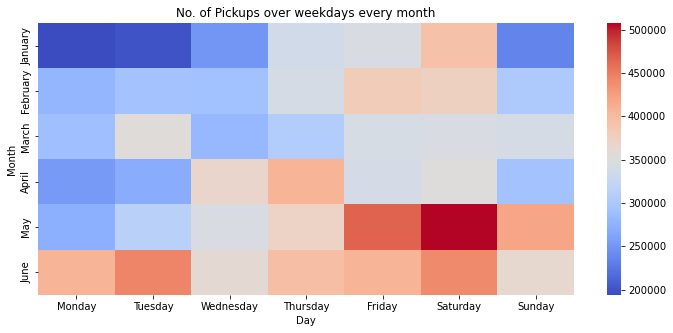

In [39]:
plt.figure(figsize=(12,5))
sns.heatmap(pivot_month,cmap='coolwarm')
plt.title("No. of Pickups over weekdays every month")
plt.show()

### Heatmap of Pickups of weekdays vs Hour of the day

In [40]:
#Creating pivot table for the dataframe 'hour_weekday' with index as'Day'
pivot_hour = hour_weekday.pivot(index='Day',columns='Hour',values='Pickups')
pivot_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Monday,50060,28139,16854,12698,19126,30747,49151,74513,97634,94270,...,73256,81491,88099,101830,117470,111399,103783,101626,91676,70006
Tuesday,44631,24787,14536,9910,14654,25461,46087,77522,102528,97278,...,74420,85273,97523,121235,145438,142675,133459,131787,119541,90048
Wednesday,52478,27883,16161,11039,15543,25467,45755,77239,100309,94343,...,73131,85432,99521,118751,141542,143751,136003,133993,127026,99490
Thursday,66310,37832,25499,18877,20923,29380,48832,80451,103951,99270,...,81645,93578,108978,131500,157689,161285,153067,158702,155247,131889
Friday,85939,46616,28102,19518,23575,30220,48244,76593,100528,100719,...,87761,98874,113645,133914,156446,171715,162018,151694,162714,168020
Saturday,145811,103689,71950,49893,37186,26454,27185,31932,44353,59879,...,98131,106156,124405,144664,154750,171540,163650,158899,170421,176181
Sunday,156949,125564,87501,61720,42031,25794,23279,25293,34045,47678,...,96119,98610,104999,112096,113758,105099,96594,93761,96329,79155


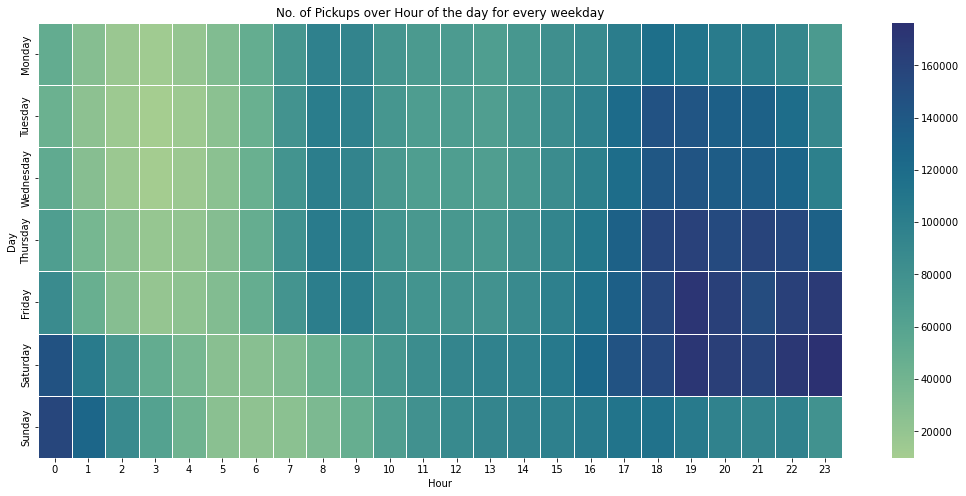

In [41]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_hour,cmap='crest',linewidth=.5)
plt.title("No. of Pickups over Hour of the day for every weekday")
plt.show()

### Heatmap of Pickups of Month of the week vs Month

In [42]:
#Creating a new column for Day number of each month
df['MonthDay'] = df['Pickup_date'].dt.day

In [43]:
month_monthday = df.groupby(['Month','MonthDay']).size().reset_index(name='Pickups')

#sorting the data by month based on calendar using "pd.Categorical"
month_monthday['Month'] = pd.Categorical(month_monthday['Month'], ['January','February','March','April','May','June'])
month_monthday.sort_values(by=['Month','MonthDay'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
month_monthday.reset_index(drop=True,inplace=True)
month_monthday.sample(5)

,Month,MonthDay,Pickups
87,March,29,75648
13,January,14,64725
7,January,8,73016
120,May,1,92329
74,March,16,54824


In [44]:
#Creating pivot table for the dataframe 'month_monthday' with index as'Month'
pivot_monthday=month_monthday.pivot(index='Month',columns='MonthDay',values='Pickups')
pivot_monthday

MonthDay,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
January,58045.0,40287.0,59844.0,41943.0,43678.0,53539.0,63375.0,73016.0,72124.0,80656.0,...,66819.0,73363.0,82588.0,59382.0,44310.0,25954.0,61626.0,70441.0,85565.0,94448.0
February,78592.0,70193.0,71532.0,68237.0,82336.0,87568.0,82752.0,64327.0,63306.0,66197.0,...,67844.0,72494.0,80520.0,75992.0,84840.0,90217.0,89716.0,NaN,NaN,NaN
March,70839.0,57460.0,75048.0,71931.0,77446.0,83134.0,81468.0,61824.0,53920.0,72185.0,...,69337.0,60498.0,64400.0,73953.0,78552.0,84977.0,92527.0,75648.0,62780.0,78893.0
April,69223.0,74069.0,75983.0,69189.0,58357.0,53565.0,68079.0,72023.0,77520.0,81439.0,...,82124.0,92110.0,99688.0,106270.0,88673.0,64783.0,68863.0,75940.0,84330.0,NaN
May,92329.0,104978.0,80300.0,65447.0,76195.0,80447.0,87361.0,90733.0,98359.0,80146.0,...,85771.0,78343.0,68328.0,59748.0,72820.0,88662.0,95074.0,98200.0,104429.0,96947.0
June,93499.0,97592.0,87206.0,95023.0,101922.0,101773.0,88876.0,76899.0,82463.0,87403.0,...,75418.0,93172.0,91388.0,100073.0,99508.0,136193.0,93108.0,74430.0,82627.0,NaN


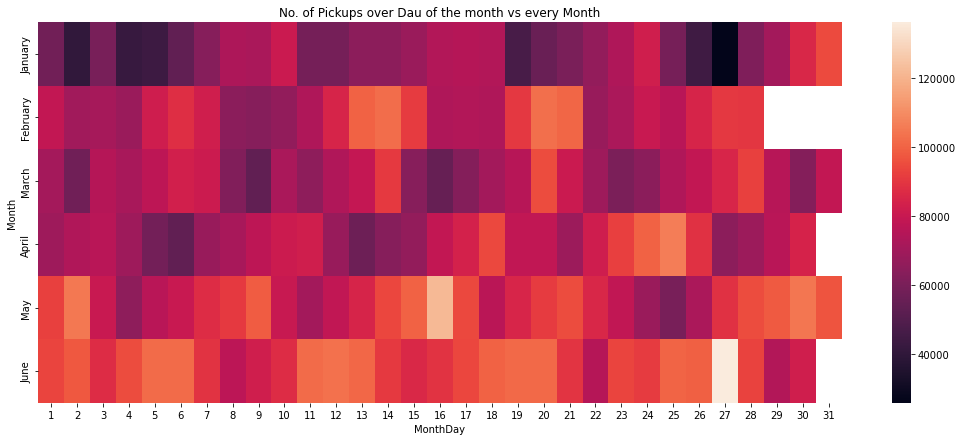

In [45]:
plt.figure(figsize=(18,7))
sns.heatmap(pivot_monthday)
plt.title("No. of Pickups over Dau of the month vs every Month")
plt.show()

### Heatmap of Pickups of Hour of the Day vs Day of the Month

In [46]:
Hour_monthday=df.groupby(['MonthDay','Hour']).size().reset_index(name='Pickups')
Hour_monthday

,MonthDay,Hour,Pickups
0,1,0,24350
1,1,1,19585
2,1,2,16494
3,1,3,11845
4,1,4,8831
...,...,...,...
739,31,19,20495
740,31,20,19526
741,31,21,17549
742,31,22,16145


In [47]:
#creating pivot table for dataframe 'Hour_monthday'
pivot_hour_day=Hour_monthday.pivot(index='Hour',columns='MonthDay',values='Pickups')

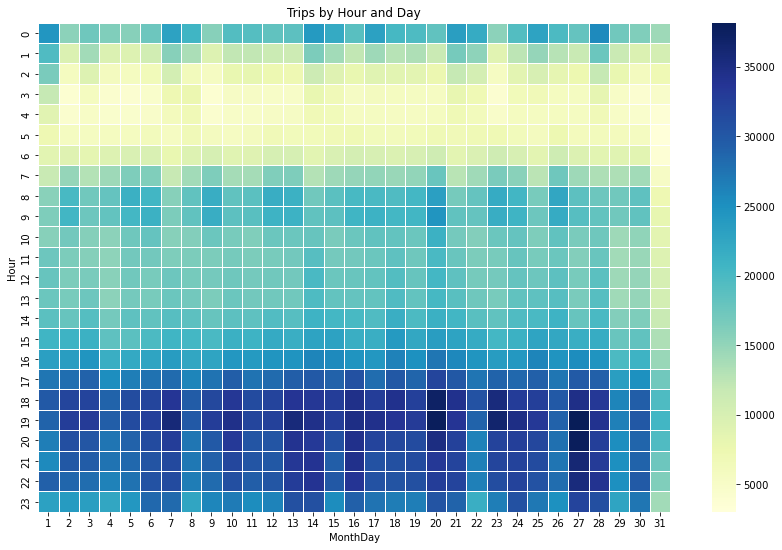

In [48]:
plt.figure(figsize = (15,9))

#cmap sets color of the heatmap, square=True makes each of the box in heatmap as square
ax = sns.heatmap(pivot_hour_day, cmap=plt.cm.YlGnBu, linewidth = .5,square=True)
ax.set(title="Trips by Hour and Day");

### No. of pickups per each Day of Month

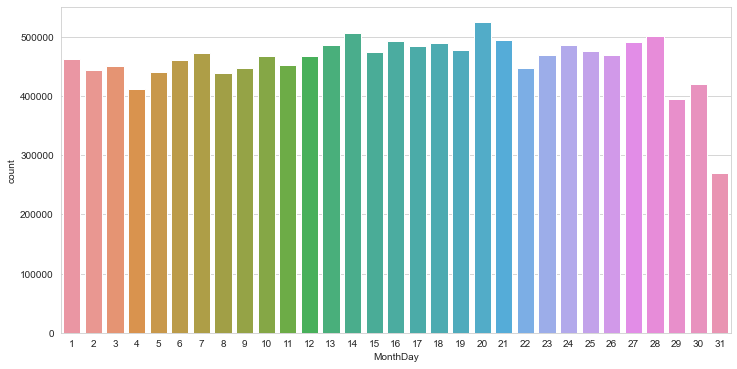

In [49]:
plt.figure(figsize=(12,6))

#set_style(whitegrid) adds whiteline grid on the graph being displayed(This helps in easily identifying values)
sns.set_style("whitegrid")
sns.countplot(x="MonthDay",data=df)
plt.show()

### Boxplot of Distribution of Pickups from Dispatching Base on monthly basis

In [50]:
total_base=df['Dispatching_base_num'].unique().tolist()

In [51]:
Disp_base['Dispatching_base_num'] = pd.Categorical(Disp_base['Dispatching_base_num'], total_base)
Disp_base.sort_values(by='Dispatching_base_num',inplace=True)
Disp_base.head()

,Dispatching_base_num,Month,Pickups
31,B02617,June,319559
25,B02617,May,331883
4,B02617,January,354848
22,B02617,April,326930
11,B02617,February,386767


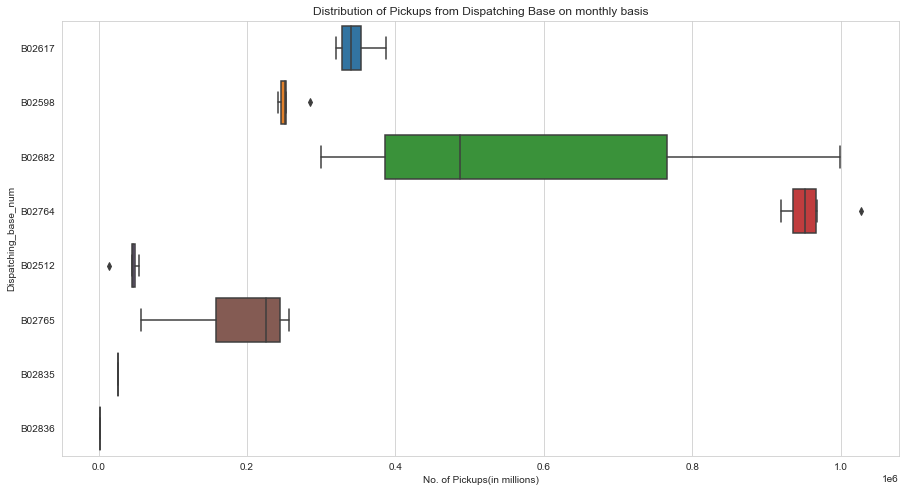

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Dispatching_base_num',x='Pickups',data=Disp_base)
plt.title('Distribution of Pickups from Dispatching Base on monthly basis')
plt.xlabel('No. of Pickups(in millions)')
plt.show()

### Boxplot of Distribution of Pickups from Dispatching Base on weekday basis

In [53]:
Disp_base_weekday=df.groupby(['Dispatching_base_num','Day']).size().reset_index(name='Pickups')

In [54]:
#sorting the dataframe Disp_base according to calendar months using "pd.Categorical"
Disp_base_weekday['Day'] = pd.Categorical(Disp_base_weekday['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
Disp_base_weekday.sort_values(by='Day',inplace=True)

Disp_base_weekday['Dispatching_base_num'] = pd.Categorical(Disp_base_weekday['Dispatching_base_num'], total_base)
Disp_base_weekday.sort_values(by='Dispatching_base_num',inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
Disp_base_weekday.reset_index(drop=True,inplace =True)
Disp_base_weekday.head()

,Dispatching_base_num,Day,Pickups
0,B02617,Monday,244034
1,B02617,Thursday,323217
2,B02617,Wednesday,283164
3,B02617,Friday,331365
4,B02617,Sunday,276125


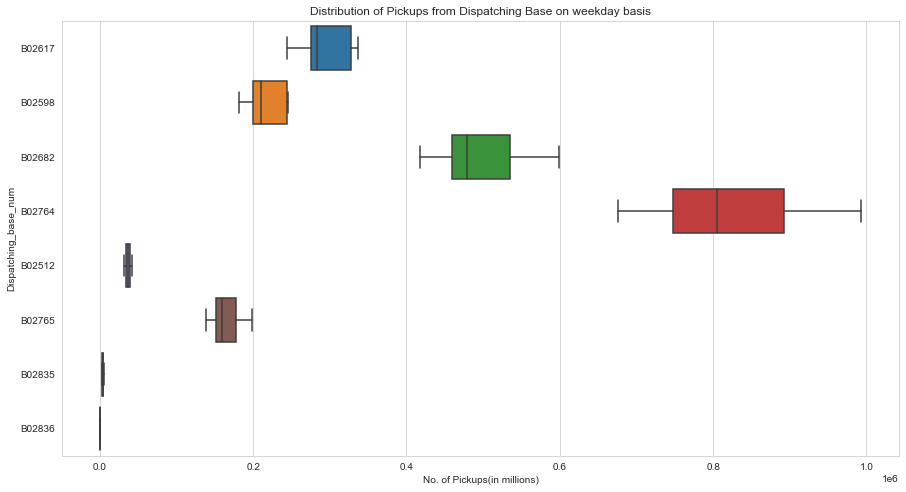

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Dispatching_base_num',x='Pickups',data=Disp_base_weekday)
plt.title('Distribution of Pickups from Dispatching Base on weekday basis')
plt.xlabel('No. of Pickups(in millions)')
plt.show()

### Pie chart of Percentage of total pickups of every Weekday

In [56]:
weekday_pickups = df.groupby(['Day']).size().reset_index(name='Pickups')

#sorting the dataframe Disp_base according to calendar months using "pd.Categorical"
weekday_pickups['Day'] = pd.Categorical(weekday_pickups['Day'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_pickups.sort_values(by='Day',inplace=True)

#setting "Day" column as index for the dataframe "weekday_pickups"
weekday_pickups.set_index('Day',inplace=True)

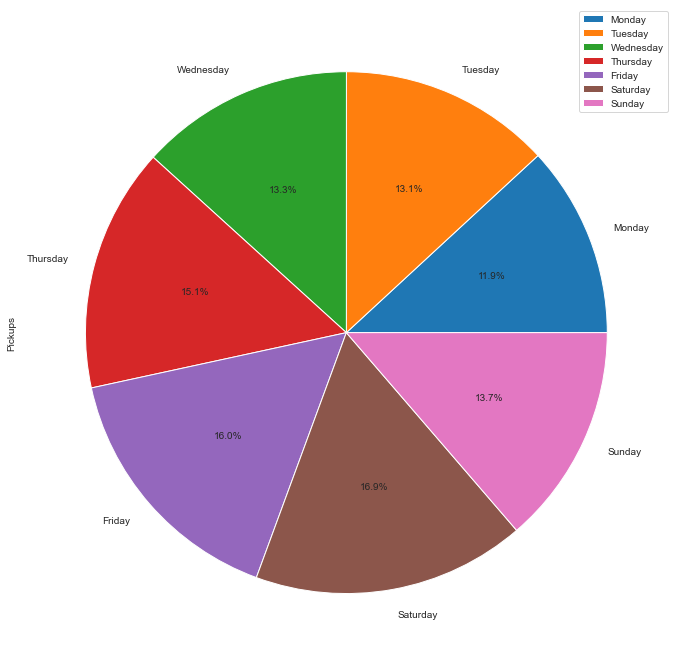

In [57]:
# autopct shows the percentage of the certain element out of the overall distribution
weekday_pickups.plot.pie(y='Pickups',figsize=(12,12),autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

### Pie chart of Percentage of total pickups of every Month

In [58]:
#Copying a dataframe using copy() function to create new dataframe and make changes to the new dataframe
Monthly_pickups = Monthly_traffic.copy()
Monthly_pickups.set_index('Month',inplace=True)
Monthly_pickups

,Pickups
Month,
January,1953801
February,2263620
March,2259773
April,2280837
May,2695553
June,2816895


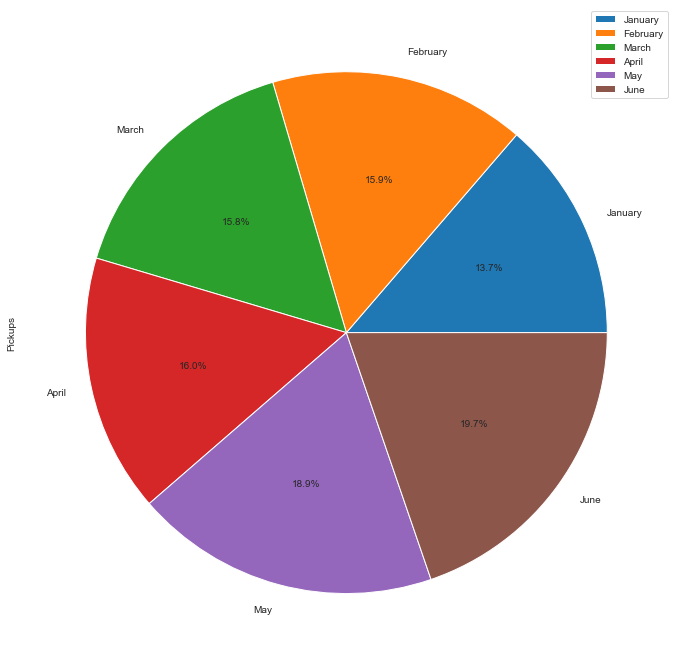

In [59]:
# autopct shows the percentage of the certain element out of the overall distribution
Monthly_pickups.plot.pie(y='Pickups',figsize=(12,12),autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()